# Machine Learning Coursera 

Exercise 3 : Multi-Class Classification

In this exercise, we will use logistic regression and neural networks to recognize handwritten digits (from 0 to 9). Automated handwritten digit recognition is widely used today - from recognizing zip codes (postal codes) on mail envelopes to recognizing amounts written on bank checks. This exercise will show you how the methods we’ve learned can be used for this classification task.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy.optimize import minimize
%matplotlib inline

In [2]:
data = sio.loadmat('ex3data1.mat')             # Each training example is a 20 pixel by 20 pixel grayscale image
                                               # of the digit. Each pixel is represented by a floating point number
                                               # indicating the grayscale intensity at that location.
sio.whosmat('ex3data1.mat')         # sio.whosmat list the variables inside the mat file. 

[('X', (5000, 400), 'double'), ('y', (5000, 1), 'double')]

In [3]:
X = data.get("X")
y = data.get("y")

In [4]:
X1 = np.hstack((np.ones((len(y),1)),X))                # add a new row of ones

Now we will plot the the images for better visualisation.Let's see how it look like.

## ============================= Plotting ===========================

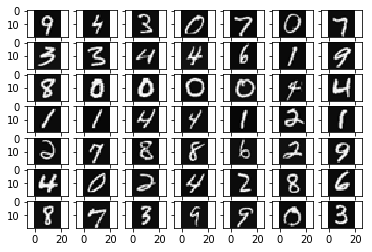

In [5]:
rand_indices = np.random.randint(0,len(X),49)
X2 = X[rand_indices,:]
fig, ax = plt.subplots(7,7,sharex=True,sharey=True)
img_num = 0
for i in range(7):
    for j in range(7):
        img = X2[img_num,:].reshape(20,20).T
        ax[i][j].imshow(img,cmap='gray')
        img_num += 1

As we know that there are 5000 images each of 20 X 20 pixel. So each training set has different intensities at different pixel locations. These all pixel infomations are the features of the training set. Here we have printed only 49 random images just to see how it looks like.

In [6]:
def sigmoid(z):                        # defining sigmoid i.e, y = 1 /( 1 + e^(-ax + b))
    return (1 /( 1 + np.exp(-z)))

## ========================== Cost Function =========================

As we know,
        
            Cost( h(x), y) = { -log( h(x)); if y = 1
                               -log(1 - h(x)); if y = 0 }
                               
instead of defining both function we can rewrite it as,

            Cost( h(x), y) = { - y*log( h(x)) - (1 - y)*log(1 - h(x))  
            
as we know sigmoid function y = 1 /( 1 + e^(-ax + b)), so here we consider b = 0 for simplicity and our job is to compute a,in other words we have to compute theta and minimize the cost.

In [7]:
def cost(theta, X, y, l):                         ## defining the cost function (error function) to compute cost
    m = len(y)
    J = 0
    X = np.matrix(X)
    y = np.matrix(y)
    
    h_theta = sigmoid(np.dot(X, theta))
    
    y1 = y.T * (np.log(h_theta))
    
    y2 = (1-y).T * (np.log( 1 - h_theta )) 
#    print(X.shape, theta.shape, y.shape, h_theta.shape, y1.shape, y2.shape)
    reg = ( float(l) / (2*m)) * np.power(theta[1:theta.shape[0]],2).sum()
    J = -(1./m)*(y1 + y2).sum() + reg
    
    return J 

Here i have defined the cost two times because after calling this through the classify we are passing the different parameters, so shape changes.

In [8]:
def Cost(theta, X, y, l):                         ## defining the cost function (error function) to compute cost
    m = len(y)
    J = 0
    X = np.matrix(X)
    y = np.matrix(y)
    
    h_theta = sigmoid(np.dot(X, theta))
    
    y1 = y * (np.log(h_theta))
    
    y2 = (1-y) * (np.log( 1 - h_theta )) 
#    print(X.shape, theta.shape, y.shape, h_theta.shape, y1.shape, y2.shape)
    reg = ( float(l) / (2*m)) * np.power(theta[1:theta.shape[0]],2).sum()
    J = -(1./m)*(y1 + y2).sum() + reg
    
    return J    

In [9]:
reg = 250.0
theta = np.zeros(((X.shape[1] + 1),10)) # We have to add 10 columns for each of the digits
print(theta.shape, X1.shape, y.shape)
cost(theta, X1, y, reg)

(401, 10) (5000, 401) (5000, 1)


1603.9425758157461

This may be high cost or error and now we have to minimise it after optimizing the theta

## =================== Optimize Theta & Classify =======================

In [10]:
def gradient(theta, X, y, regul):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    error = sigmoid(X * theta.T) - y
    
    grad = ((X.T * error) / len(X)).T + ((regul / len(X)) * theta)
    
    # intercept gradient is not regularized
    grad[0, 0] = np.sum(np.multiply(error, X[:,0])) / len(X)
    
    return np.array(grad).ravel()

In [11]:
def classify(X, y, num_labels, regu):
    rows = X.shape[0]
    params = X.shape[1]
    
    all_theta = np.zeros((num_labels, params))
        
    for i in range(1, num_labels + 1):
        theta = np.zeros(params)
        y_i = np.array([1 if label == i else 0 for label in y])
        y_i = np.reshape(y_i, (rows, 1))
        fmin = minimize(fun = Cost, x0 = theta, args=(X, y_i, regu), method='TNC', jac=gradient)
        all_theta[i-1,:] = fmin.x
    return all_theta

In [12]:
theta = classify(X1, y, 10, reg)

In [13]:
cost(theta.T, X1, y, reg)

537.1120881948342

So this is the minimized cost we got now our job is to make predictions.

## ============================ Prediction ===========================

The procedure given below is to convert the data into csv format, so that we can visualize our output correctly.

In [34]:
for i in data:
        if '__' not in i and 'readme' not in i:
              np.savetxt(("file"+ i + ".csv"),data[i],delimiter=',')

In [14]:
def predict(theta, X):
    
    htheta = sigmoid(np.dot(theta, X))
    
    return np.array([1 if h > 0.5 else 0 for h in htheta])

predict_all is used to check the accuracy by computing the probability with all the outputs available in given data set.

In [41]:
def predict_all(X, theta):
    rows = X.shape[0]
    params = X.shape[1]
    num_labels = theta.shape[0]
    
    X = np.insert(X, 0, values=np.ones(rows), axis=1)
    
    X = np.matrix(X)
    theta = np.matrix(theta)
    
    h = sigmoid(X * theta.T)
    
    # create array of the index with the maximum probability
    h_argmax = np.argmax(h, axis=1)
    
    # because our array was zero-indexed we need to add one for the true label prediction
    h_argmax = h_argmax + 1
    print(str(h_argmax))
    
    return h_argmax

In [42]:
y_pred = predict_all(data['X'], theta)
correct = [1 if a == b else 0 for (a, b) in zip(y_pred, data['y'])]
accuracy = (sum(map(int, correct)) / float(len(correct)))
print('accuracy = {}%'.format(accuracy * 100))

[[10]
 [10]
 [10]
 ..., 
 [ 4]
 [ 9]
 [10]]
accuracy = 83.22%


In [25]:
def f(x):
    no = 0
    for i in range(10):
        if x[i] == 1:
            no = i + 1
            if no == 10:
                print("We predict the digit should be", 0)
            else:
                print("We predict the digit should be", no)
    if no == 0:
        print("Can't predict, image quality is bad")

In [28]:
#for i in range(5000):
#    test = X[i,:]
#    test = np.append(1, test)
#    predic = predict(theta, test)
#    print(i, predic)

In [32]:
test = X[1024,:]                           # Passing the row of the pixel data to see the output.
test = np.append(1, test)
predic = predict(theta, test)
f(predic)

We predict the digit should be 2
